# Ayurvedic Prakruti Classification 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [ ]:
dataset = pd.read_csv('Dataset.csv')

### Shuffling Dataset

In [ ]:
dataset = dataset.reindex(np.random.permutation(dataset.index))
dataset.reset_index(inplace=True,drop=True)

### Splitting into dependent and independent variables

In [ ]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [ ]:
print(x)

In [ ]:
print(y)

['Kapha' 'Vata' 'Vata' ... 'Pitta' 'Vata' 'Vata']


# Label Encoding Dependent Variable (Ayurvedic Prakruti)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
print(y)

[0 2 2 ... 1 2 2]


# Treating DNA sequence as a "language", otherwise known as k-mer counting

### A function to collect all possible overlapping k-mers of a specified length from any sequence string. We will basically apply the k-mers to the complete sequences.

In [ ]:
def getKmers(sequence,size = 6):
    return [sequence[x:x+size].lower() for x in range(len(sequence)-size+1)]

## Now we can convert our training data sequences into short overlapping k-mers of length 6

In [ ]:
kmerData = []

for i in x:
    kmerData.append(getKmers(str(i)))

In [ ]:
print(kmerData[111])

In [ ]:
text_data = []

for i in range(len(kmerData)):
    text_data.append("");
    for item in kmerData[i]:
        text_data[i] = text_data[i] + ' ' + item
    
for i in range(len(text_data)):
    text_data[i] = text_data[i][9:-8]

In [ ]:
print(text_data[0])

## Now we will apply the BAG of WORDS using CountVectorizer using Natural Language Processing

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range = (4,4))
X = cv.fit_transform(text_data).toarray()

In [ ]:
print(X.shape)

(3003, 51057)


### Checking weather the dataset is balanced or not

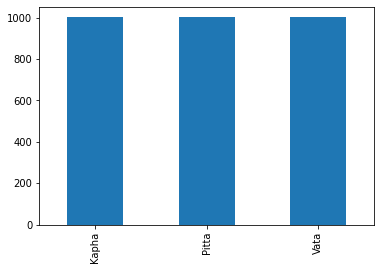

In [ ]:
dataset['Prakruti'].value_counts().sort_index().plot.bar()

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(2402, 51057)
(601, 51057)


In [ ]:
len(cv.vocabulary_)

51057

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from keras.models import Sequential
from keras import layers

In [ ]:
input_dim = X_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='softmax'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                510580    
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 510,591
Trainable params: 510,591
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train,
                    epochs=100,
                     verbose=False,
                     validation_data=(X_test, y_test),
                     batch_size=10)

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.3335
Testing Accuracy:  0.3328


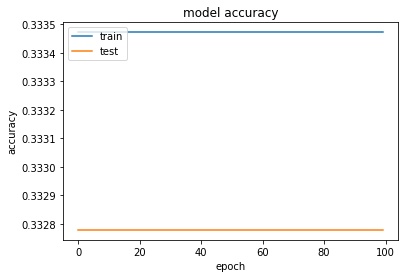

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

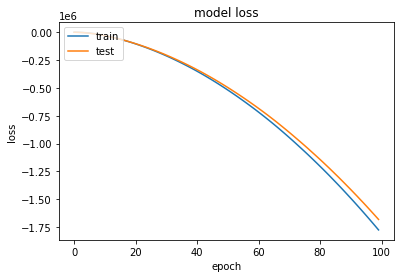

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()